In [10]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
def LSM(_xdata, _ydata, _coefs, _order):
    _a = np.array([[0.0 for j in range(_order + 2)] for i in range(_order + 1)])
    _sum_of_powers = np.array([0.0 for i in range(_order * 2 + 1)])
    
    # Create Enlarged coeffient matrix
    for k in range(len(_xdata)):
        for i in range(_order * 2 + 1):
            _sum_of_powers[i] += pow(_xdata[k], i)
        for i in range(_order + 1):
            _a[i][_order + 1] += pow(_xdata[k], i) * _ydata[k]
            
    for i in range(_order + 1):
        for j in range(_order + 1):
            _a[i][j] = _sum_of_powers[i + j]
    
    # Gauss-Jordan method
    for k in range(_order + 1):
        _pivot = _a[k][k]        
        for j in range(k, _order + 2):
            _a[k][j] /= _pivot
        for i in range(_order + 1):
            if(k != i):
                _a[i][j] -= _a[i][k] * _a[k][j]

    print(_a)
            
            
xdata = np.array([-166.7 + i * 0.5 for i in range(0, 5, 1)])
ydata = np.array([2.7, 3.0, 2.95, 2.73, 2.62])
coeff = []
LSM(xdata, ydata, coeff, 3)

x = np.linspace(xdata.min() - 1.0, xdata.max() + 1.0, 1000)
W3 = Polynomial.fit(xdata, ydata, 3)
W3.convert().coef

[[ 5.00000000e+00 -8.28500000e+02  1.37284950e+05 -2.27489447e+07
   1.40000000e+01]
 [-8.28500000e+02  1.37284950e+05 -2.27489447e+07  3.76970607e+09
  -2.32001500e+03]
 [ 1.37284950e+05 -2.27489447e+07  3.76970607e+09 -6.24685792e+11
   3.84468863e+05]
 [-2.27489447e+07  3.76970607e+09 -6.24685792e+11  1.03519860e+14
  -6.37146317e+07]]
[[ 1.00000000e+00 -1.65700000e+02  2.74569900e+04 -4.54978894e+06
   2.79922701e+00]
 [-8.28500000e+02  1.00000000e+00 -1.65706035e+02  2.74589900e+04
   1.53288199e-06]
 [ 1.37284950e+05 -2.27489447e+07  1.00000000e+00 -1.65712069e+02
   6.71767851e-11]
 [-2.27489447e+07  3.76970607e+09 -6.24685792e+11  1.00000000e+00
  -5.62258118e-11]]


array([1.38737162e+06, 2.51658853e+04, 1.52161143e+02, 3.06666667e-01])

MSE: 2.8571428571429127e-05


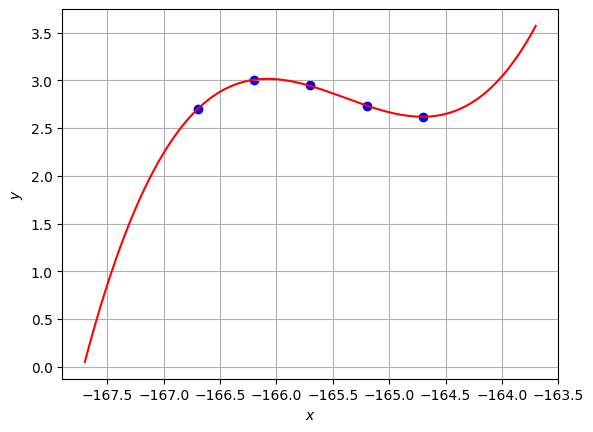

In [9]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, marker='o', color='b')
ax.plot(x, W3(x), color='r')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid()

MSE = np.mean((ydata - W3(xdata)) ** 2)
print(f'MSE: {MSE}')